In [2]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [5]:
actions = ['graduate'] 

data = np.concatenate([
     
     np.load('D:\캡스톤 연습\dataset_words2\seq_graduate_1684914347.npy')

], axis=0)

data.shape

(810, 30, 100)

In [7]:
x_data = data[:,:, :-1] #라벨 값만 빼고 x_data로 만듦
labels = data[:,0,-1] #마지막 값이 라벨이므로 마지막 값만 라벨로 만듬

print(x_data.shape)
print(labels.shape)

[[[ 3.23562235e-01  5.09559214e-01 -1.26158040e-09 ...  9.97380295e+01
    1.14139198e+02  4.95483932e+01]
  [ 5.64963937e-01  5.20040870e-01 -3.32146499e-07 ...  8.67618713e+01
    1.39816849e+02  3.84201088e+01]
  [ 5.64120471e-01  4.43466127e-01 -4.62855354e-07 ...  1.09112045e+02
    4.78558006e+01  1.13843773e+02]
  ...
  [ 5.57723105e-01  4.30861533e-01 -3.26198517e-07 ...  1.26066597e+02
    5.20232735e+01  1.15231712e+02]
  [ 3.05494726e-01  4.47052121e-01 -1.90058358e-07 ...  9.60605621e+01
    5.06526985e+01  1.21442047e+02]
  [ 5.65680265e-01  4.39594388e-01 -2.74753319e-07 ...  1.01200661e+02
    1.20123573e+02  5.95024529e+01]]

 [[ 5.64963937e-01  5.20040870e-01 -3.32146499e-07 ...  8.67618713e+01
    1.39816849e+02  3.84201088e+01]
  [ 5.64120471e-01  4.43466127e-01 -4.62855354e-07 ...  1.09112045e+02
    4.78558006e+01  1.13843773e+02]
  [ 3.10517579e-01  4.48085725e-01 -2.69390796e-07 ...  1.01781708e+02
    2.02303181e+01  1.40647934e+02]
  ...
  [ 3.05494726e-01  4.4

In [5]:
from keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(3951, 6)

In [6]:
from sklearn.model_selection import train_test_split
# training set과 testset을 나눔

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(3555, 30, 99) (3555, 6)
(396, 30, 99) (396, 6)


In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import plot_model

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 44,262
Trainable params: 44,262
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [32]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=60,
    callbacks=[
        ModelCheckpoint('models/model3.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/60
111/112 [============================>.] - ETA: 0s - loss: 13.7416 - acc: 0.4133
Epoch 1: val_acc improved from -inf to 0.41919, saving model to models\model3.h5
112/112 [==============================] - 3s 14ms/step - loss: 13.7326 - acc: 0.4132 - val_loss: 7.4071 - val_acc: 0.4192 - lr: 0.0010
Epoch 2/60
108/112 [===========================>..] - ETA: 0s - loss: 3.0374 - acc: 0.6308
Epoch 2: val_acc improved from 0.41919 to 0.71465, saving model to models\model3.h5
112/112 [==============================] - 1s 12ms/step - loss: 2.9915 - acc: 0.6321 - val_loss: 1.4404 - val_acc: 0.7146 - lr: 0.0010
Epoch 3/60
111/112 [============================>.] - ETA: 0s - loss: 1.3457 - acc: 0.7506
Epoch 3: val_acc improved from 0.71465 to 0.84343, saving model to models\model3.h5
112/112 [==============================] - 1s 12ms/step - loss: 1.3446 - acc: 0.7508 - val_loss: 0.6623 - val_acc: 0.8434 - lr: 0.0010
Epoch 4/60
111/112 [============================>.] - ETA: 0s - loss: 0

13/13 [==============================] - 0s 5ms/step


KeyError: 'val_precision'

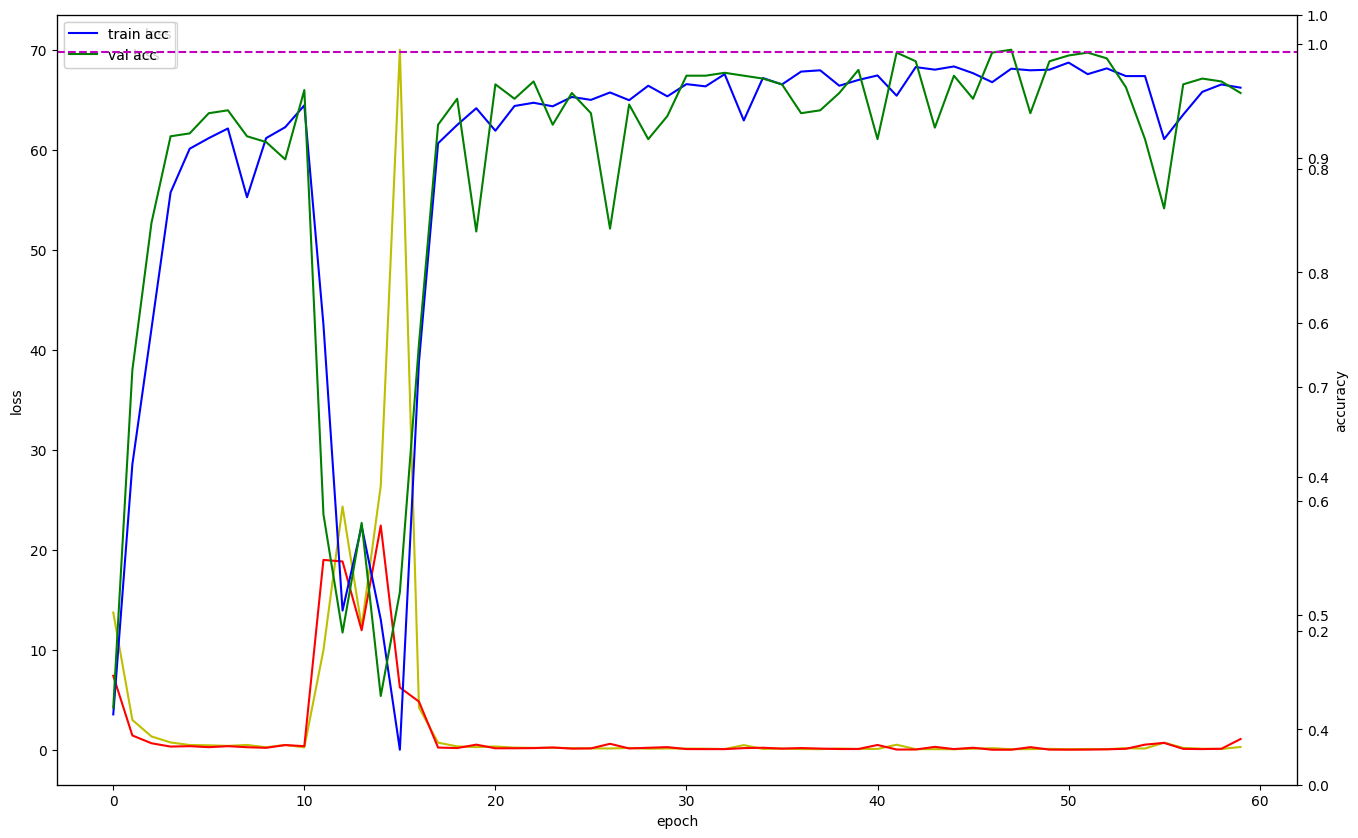

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# 예측값과 실제값으로부터 TP, FP, FN 계산
y_pred = model.predict(x_val)  # 예측값
y_pred_binary = np.argmax(y_pred, axis=1)  # 다중 클래스 분류에서 이진 분류로 변환
y_true = np.argmax(y_val, axis=1)  # 실제값

tp = np.sum((y_true == 1) & (y_pred_binary == 1))
fp = np.sum((y_true == 0) & (y_pred_binary == 1))
fn = np.sum((y_true == 1) & (y_pred_binary == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)

# 그래프 그리기
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()
pr_rc_ax = loss_ax.twinx()

# Loss 그래프 그리기
loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

# Accuracy 그래프 그리기
acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

# Precision 그래프 그리기
pr_rc_ax.axhline(y=precision, color='m', linestyle='--', label='precision')
pr_rc_ax.plot(history.history['val_precision'], 'c', label='val precision')
pr_rc_ax.set_ylabel('precision')
pr_rc_ax.legend(loc='upper right')

# Recall 그래프 그리기
pr_rc_ax.axhline(y=recall, color='k', linestyle='--', label='recall')
pr_rc_ax.plot(history.history['val_recall'], 'y', label='val recall')
pr_rc_ax.set_ylabel('recall')
pr_rc_ax.legend(loc='lower right')

plt.show()


KeyError: 'precision'

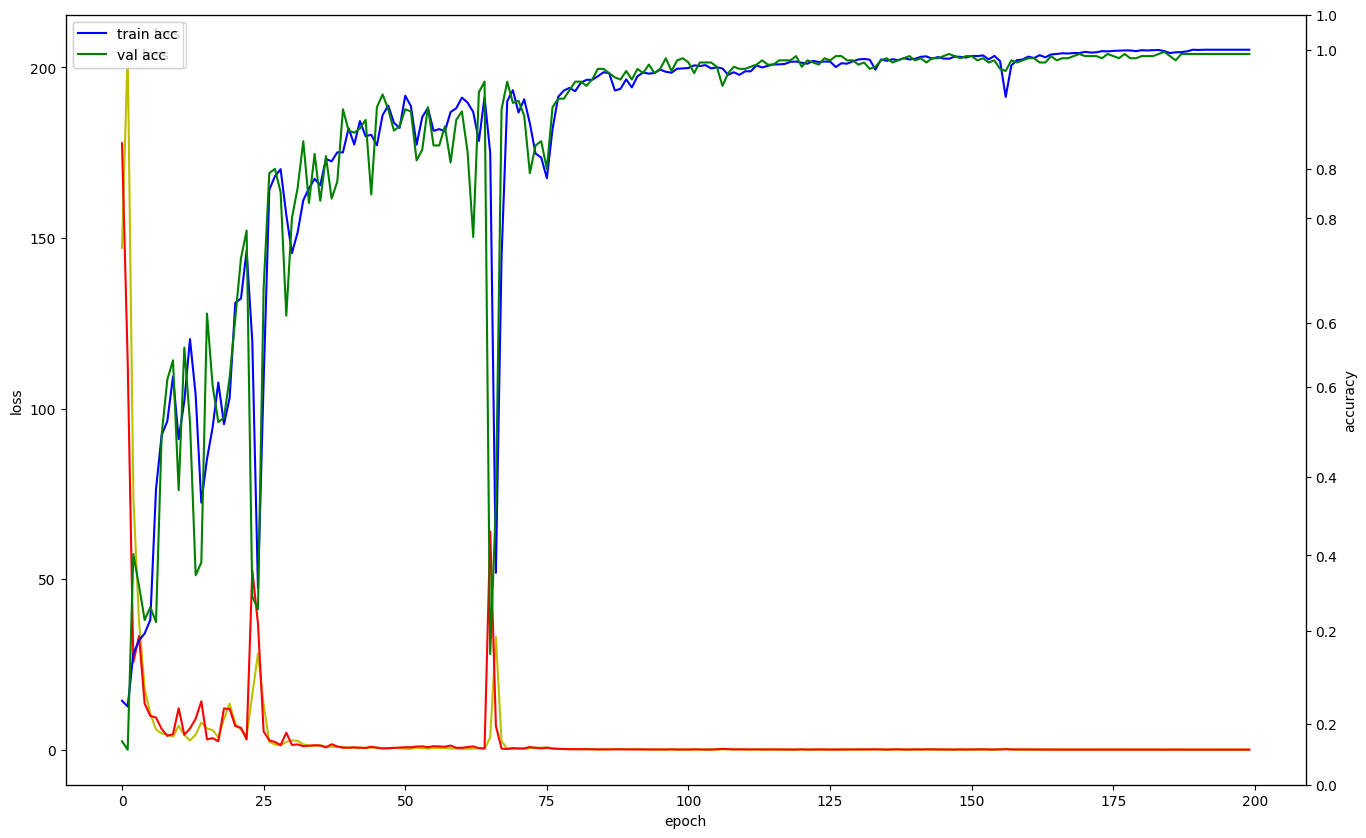

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision and recall
precision = np.divide(history.history['tp'], history.history['tp'] + history.history['fp'])
recall = np.divide(history.history['tp'], history.history['tp'] + history.history['fn'])

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()
pr_rc_ax = loss_ax.twinx()

# Plot loss
loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

# Plot accuracy
acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

# Plot precision
pr_rc_ax.plot(precision, 'm', label='train precision')
pr_rc_ax.plot(history.history['val_precision'], 'c', label='val precision')
pr_rc_ax.set_ylabel('precision')
pr_rc_ax.legend(loc='upper right')

# Plot recall
pr_rc_ax.plot(recall, 'k', label='train recall')
pr_rc_ax.plot(history.history['val_recall'], 'y', label='val recall')
pr_rc_ax.set_ylabel('recall')
pr_rc_ax.legend(loc='lower right')

plt.show()


13/13 [==============================] - 0s 5ms/step


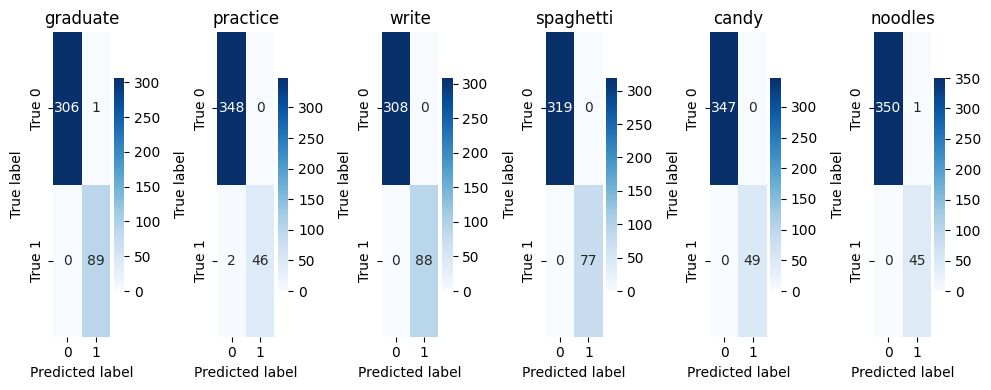

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from keras.models import load_model
import seaborn as sns

# 모델 로드
model = load_model('models/model3.h5')

# 예측 결과 계산
y_pred = model.predict(x_val)

# 혼동 행렬 계산
cm = multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

# 클래스 레이블 리스트
classes = ['graduate', 
           'practice', 
           'write', 
           'spaghetti',
           'candy',
           'noodles']  # 클래스 레이블에 맞게 수정

# 혼동 행렬 시각화
def plot_confusion_matrix(confusion_matrices, classes):
    """
    혼동 행렬을 표로 시각화하여 출력합니다.
    
    Parameters:
        confusion_matrices (numpy.ndarray): 혼동 행렬들의 배열
        classes (list): 클래스 레이블 리스트
    
    Returns:
        None
    """
    dfs = []
    for i, cm in enumerate(confusion_matrices):
        df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['0', '1'])
        df.index.name = f'{classes[i]}'
        dfs.append(df)
    
    fig, axes = plt.subplots(nrows=1, ncols=len(confusion_matrices), figsize=(10, 4))
    for i, df in enumerate(dfs):
        ax = sns.heatmap(df, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        ax.set_title(f'{classes[i]}')
        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')
    
    plt.tight_layout()
    plt.show()

# 혼동 행렬 시각화
plot_confusion_matrix(cm, classes)


In [35]:
from sklearn.metrics import multilabel_confusion_matrix
from keras.models import load_model

model = load_model('models/model3.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

13/13 [==============================] - 0s 5ms/step


array([[[306,   1],
        [  0,  89]],

       [[348,   0],
        [  2,  46]],

       [[308,   0],
        [  0,  88]],

       [[319,   0],
        [  0,  77]],

       [[347,   0],
        [  0,  49]],

       [[350,   1],
        [  0,  45]]], dtype=int64)